<a href="https://colab.research.google.com/github/vivekvr1/Gen_ai-Projects/blob/main/Instructor%2C_Generating_Structure_from_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructor, Generating Structure from LLMs**

**Instructor** makes it easy to reliably get structured data like JSON from Large Language Models (LLMs) like GPT-3.5, GPT-4, GPT-4-Vision, including open source models like Mistral/Mixtral from Together, Anyscale, Ollama, and llama-cpp-python.

In [ ]:
pip install -U instructors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.2/407.2 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.3
    Uninstalling pydantic_core-2.16.3:
      Successfully uninstalled pydantic_core-2.16.3
  Attempting uninstall: docstring-parser
    Found existing installation: docstring_parser 0.16
    Uninstalling docstring_parser-0.16:
      Successfully uninstalled docstring_parser-0.16
  Attempting uninstall: pydantic
    Found existing installation

In [ ]:
!sudo apt-get install --reinstall xdg-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 1 reinstalled, 0 to remove and 45 not upgraded.
Need to get 61.9 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 xdg-utils all 1.1.3-4.1ubuntu3~22.04.1 [61.9 kB]
Fetched 61.9 kB in 1s (65.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../xdg-utils_1.1.3-4.1ubuntu3~22.04.

In [ ]:
!pip install -qq graphviz

In [ ]:
!pip install anthropic mistralai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.27.0
    Uninstalling httpx-0.27.0:
      Successfully uninstalled httpx-0.27.0


In [ ]:
api_key='DSHO9KbThDeQ4pHcn42JnhjVmB6fmHmA'

In [ ]:
import instructor

from pydantic import BaseModel
from mistralai.client import MistralClient

client = MistralClient(api_key=api_key)

patched_chat = instructor.patch(create=client.chat, mode=instructor.Mode.JSON_SCHEMA)

class UserDetails(BaseModel):
    name: str
    age: int

resp = patched_chat(
    model="mistral-large-latest",
    response_model=UserDetails,
    messages=[
        {
            "role": "user",
            "content": f'Extract the following entities: "Jason is 20"',
        },
    ],
)
print(resp)
# name='Jason' age=20

name='Jason' age=20


In [ ]:
from pydantic import BaseModel, Field
from typing import List


class Node(BaseModel):
    id: int
    label: str
    color: str


class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"


class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)

In [ ]:
def generate_graph(input) -> KnowledgeGraph:
    return patched_chat(
        model="mistral-large-latest",
        messages=[
            {
                "role": "user",
                "content": f"Help me understand the following by describing it as a detailed knowledge graph: {input}",
            }
        ],
        response_model=KnowledgeGraph,
    )  # type: ignore


In [ ]:
graph = generate_graph("Teach me about Generative AI from basics")

In [ ]:
import graphviz
graphviz.set_jupyter_format('svg')

'svg'

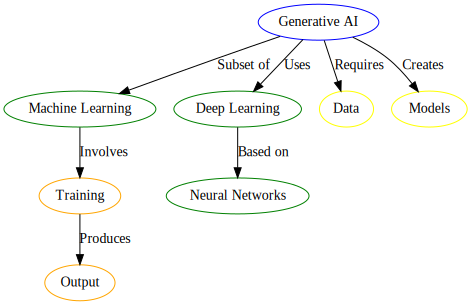

In [ ]:
from graphviz import Digraph


def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    dot.format = 'svg'
    return dot

visualize_knowledge_graph(graph)

In [ ]:
text_chunks = [
    "Jason knows a lot about quantum mechanics. He is a physicist. He is a professor",
    "Professors are smart.",
    "Sarah knows Jason and is a student of his.",
    "Sarah is a student at the University of Toronto. and UofT is in Canada",
]

In [ ]:
from typing import Optional
class KnowledgeGraph(BaseModel):
    nodes: Optional[List[Node]] = Field(..., default_factory=list)
    edges: Optional[List[Edge]] = Field(..., default_factory=list)

    def update(self, other: "KnowledgeGraph") -> "KnowledgeGraph":
        """Updates the current graph with the other graph, deduplicating nodes and edges."""
        return KnowledgeGraph(
            nodes=list(self.nodes + other.nodes),
            edges=list(self.edges + other.edges),
        )

    def draw(self, prefix: str = None):
        dot = Digraph(comment="Knowledge Graph")

        for node in self.nodes:
            dot.node(str(node.id), node.label, color=node.color)

        for edge in self.edges:
            dot.edge(
                str(edge.source), str(edge.target), label=edge.label, color=edge.color
            )
        dot.render(prefix, format="png")
        return dot


In [ ]:
def generate_graph(input: List[str]) -> KnowledgeGraph:
    cur_state = KnowledgeGraph()
    num_iterations = len(input)
    for i, inp in enumerate(input):
        new_updates = patched_chat(
            model="mistral-large-latest",
            messages=[
                {
                    "role": "system",
                    "content": """You are an iterative knowledge graph builder.
                    You are given the current state of the graph, and you must append the nodes and edges
                    to it Do not procide any duplcates and try to reuse nodes as much as possible.""",
                },
                {
                    "role": "user",
                    "content": f"""Extract any new nodes and edges from the following:
                    # Part {i}/{num_iterations} of the input:

                    {inp}""",
                },
                {
                    "role": "user",
                    "content": f"""Here is the current state of the graph:
                    {cur_state.model_dump_json(indent=2)}""",
                },
            ],
            response_model=KnowledgeGraph,
        )  # type: ignore

        # Update the current state
        cur_state = cur_state.update(new_updates)
        cur_state.draw(prefix=f"iteration_{i}")
    return cur_state

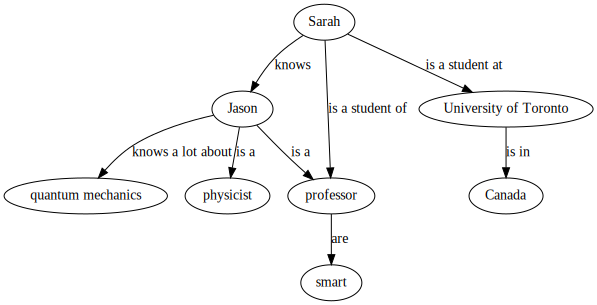

In [ ]:
graph: KnowledgeGraph = generate_graph(text_chunks)
graph.draw(prefix="final")

In [ ]:
import enum
from typing import List
from pydantic import Field, BaseModel


class QueryType(str, enum.Enum):
    """Enumeration representing the types of queries that can be asked to a question answer system."""

    SINGLE_QUESTION = "SINGLE"
    MERGE_MULTIPLE_RESPONSES = "MERGE_MULTIPLE_RESPONSES"


class Query(BaseModel):
    """Class representing a single question in a query plan."""

    id: int = Field(..., description="Unique id of the query")
    question: str = Field(
        ...,
        description="Question asked using a question answering system",
    )
    dependencies: List[int] = Field(
        default_factory=list,
        description="List of sub questions that need to be answered before asking this question",
    )
    node_type: QueryType = Field(
        default=QueryType.SINGLE_QUESTION,
        description="Type of question, either a single question or a multi-question merge",
    )


class QueryPlan(BaseModel):
    """Container class representing a tree of questions to ask a question answering system."""

    query_graph: List[Query] = Field(
        ..., description="The query graph representing the plan"
    )

    def _dependencies(self, ids: List[int]) -> List[Query]:
        """Returns the dependencies of a query given their ids."""
        return [q for q in self.query_graph if q.id in ids]


In [ ]:
def query_planner(question: str) -> QueryPlan:

    messages = [
        {
            "role": "system",
            "content": "You are a world class query planning algorithm capable ofbreaking apart questions into its dependency queries such that the answers can be used to inform the parent question. Do not answer the questions, simply provide a correct compute graph with good specific questions to ask and relevant dependencies. Before you call the function, think step-by-step to get a better understanding of the problem.",
        },
        {
            "role": "user",
            "content": f"Consider: {question}\nGenerate the correct query plan.",
        },
    ]

    root =  patched_chat(
        model="mistral-large-latest",
        temperature=0,
        response_model=QueryPlan,
        messages=messages,
        max_tokens=1000,
    )
    return root

In [ ]:
plan = query_planner(
    "What is the difference in populations of Canada and the Jason's home country?"
)
plan.model_dump()

{'query_graph': [{'id': 1,
   'question': 'What is the population of Canada?',
   'dependencies': [],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 2,
   'question': "What is Jason's home country?",
   'dependencies': [],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 3,
   'question': "What is the population of Jason's home country?",
   'dependencies': [2],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 4,
   'question': "What is the difference in populations of Canada and Jason's home country?",
   'dependencies': [1, 3],
   'node_type': <QueryType.MERGE_MULTIPLE_RESPONSES: 'MERGE_MULTIPLE_RESPONSES'>}]}